#   Hands-on Exercise 1 

In this hands-on, we are going to see the performance of the Internet-of-Things sensors that we have installed on Terceira Island.

In [ ]:
using CSV, DataFrames, Downloads, Statistics

First, we use the `read` function to read the csv file.

In [2]:
ter_1 = CSV.read("data/ter_1.csv", DataFrame); 

Getting a preview of the data.

In [3]:
@show typeof(ter_1)
ter_1[1:10,:]

typeof(ter_1) = DataFrame


Row,timestamp,station_id,wind_speed_kmh,temperature_c,radiation_kjm2,wind_direction_bin,precipitation_accum_mm,rel_humidity_pctg,pressure_hpa,id,bat_volt
,DateTime,String31,Missing,Float64,Missing,Missing,Missing,Float64,Missing,Int64,Float64?
1,2022-07-16T14:00:00,NVX_R712_00137A1000015794,missing,30.67,missing,missing,missing,51.76,missing,10307015,missing
2,2022-07-16T15:00:00,NVX_R712_00137A1000015794,missing,20.72,missing,missing,missing,80.13,missing,10307029,missing
3,2022-07-16T16:00:00,NVX_R712_00137A1000015794,missing,21.07,missing,missing,missing,83.56,missing,10307043,missing
4,2022-07-16T17:00:00,NVX_R712_00137A1000015794,missing,20.1,missing,missing,missing,85.22,missing,10307056,missing
5,2022-07-16T18:00:00,NVX_R712_00137A1000015794,missing,19.07,missing,missing,missing,89.77,missing,10307070,missing
6,2022-07-16T19:00:00,NVX_R712_00137A1000015794,missing,18.66,missing,missing,missing,88.76,missing,10307084,missing
7,2022-07-16T20:00:00,NVX_R712_00137A1000015794,missing,17.81,missing,missing,missing,93.71,missing,10307098,missing
8,2022-07-16T22:00:00,NVX_R712_00137A1000015794,missing,17.52,missing,missing,missing,96.06,missing,10307124,missing
9,2022-07-17T02:00:00,NVX_R712_00137A1000015794,missing,17.02,missing,missing,missing,98.54,missing,10307174,missing


To select the desired rows (or the ones that we want to exclude), we can use the `select` function.

In [4]:
select!(ter_1, Not([:wind_speed_kmh, :radiation_kjm2, :wind_direction_bin, :precipitation_accum_mm, :pressure_hpa, :id, :bat_volt]));

> Note that using the `!` syntax modifies the orginal dataframe. 

To access the columns names, we use the `names` function.

In [5]:
names(ter_1)

4-element Vector{String}:
 "timestamp"
 "station_id"
 "temperature_c"
 "rel_humidity_pctg"

Often, we need to download a file from the web. This can be done using the `download` function from the Downloads.jl package.

In [6]:
ter_2 = Downloads.download("https://raw.githubusercontent.com/igaszczesniak/tabular_data_2023/main/ter_2.csv", "data/ter_2.csv")

"data/ter_2.csv"

In [7]:
ter_2 = CSV.read("data/ter_2.csv", DataFrame); 

In [8]:
select!(ter_2, Not([:wind_speed_kmh, :radiation_kjm2, :wind_direction_bin, :precipitation_accum_mm, :pressure_hpa, :id, :bat_volt]));

To join two tables, we can generally use the `join` function and its alternatives, such as the `leftjoin` here.

In [9]:
ter_joined = leftjoin(ter_1, ter_2, on = :timestamp, makeunique=true)

Row,timestamp,station_id,temperature_c,rel_humidity_pctg,station_id_1,temperature_c_1,rel_humidity_pctg_1
,DateTime,String31,Float64,Float64,String31?,Float64?,Float64?
1,2022-07-16T14:00:00,NVX_R712_00137A1000015794,30.67,51.76,NVX_R712_00137A1000015795,30.8,52.71
2,2022-07-16T15:00:00,NVX_R712_00137A1000015794,20.72,80.13,NVX_R712_00137A1000015795,20.61,80.68
3,2022-07-16T17:00:00,NVX_R712_00137A1000015794,20.1,85.22,NVX_R712_00137A1000015795,19.97,85.51
4,2022-07-16T18:00:00,NVX_R712_00137A1000015794,19.07,89.77,NVX_R712_00137A1000015795,18.99,90.09
5,2022-07-16T19:00:00,NVX_R712_00137A1000015794,18.66,88.76,NVX_R712_00137A1000015795,18.65,89.26
6,2022-07-16T20:00:00,NVX_R712_00137A1000015794,17.81,93.71,NVX_R712_00137A1000015795,17.8,93.76
7,2022-07-17T02:00:00,NVX_R712_00137A1000015794,17.02,98.54,NVX_R712_00137A1000015795,17.07,97.95
8,2022-07-17T03:00:00,NVX_R712_00137A1000015794,17.04,97.79,NVX_R712_00137A1000015795,17.04,97.32
9,2022-07-17T08:00:00,NVX_R712_00137A1000015794,18.12,95.82,NVX_R712_00137A1000015795,18.12,95.62


There is a missing data in our dataset. We can remove rows from a dataframe that contain missing values (NaN, missing, or any other representation of missing data) using the `dropmissing` function.

In [10]:
dropmissing!(ter_joined, [:station_id, :station_id_1])

Row,timestamp,station_id,temperature_c,rel_humidity_pctg,station_id_1,temperature_c_1,rel_humidity_pctg_1
,DateTime,String31,Float64,Float64,String31,Float64?,Float64?
1,2022-07-16T14:00:00,NVX_R712_00137A1000015794,30.67,51.76,NVX_R712_00137A1000015795,30.8,52.71
2,2022-07-16T15:00:00,NVX_R712_00137A1000015794,20.72,80.13,NVX_R712_00137A1000015795,20.61,80.68
3,2022-07-16T17:00:00,NVX_R712_00137A1000015794,20.1,85.22,NVX_R712_00137A1000015795,19.97,85.51
4,2022-07-16T18:00:00,NVX_R712_00137A1000015794,19.07,89.77,NVX_R712_00137A1000015795,18.99,90.09
5,2022-07-16T19:00:00,NVX_R712_00137A1000015794,18.66,88.76,NVX_R712_00137A1000015795,18.65,89.26
6,2022-07-16T20:00:00,NVX_R712_00137A1000015794,17.81,93.71,NVX_R712_00137A1000015795,17.8,93.76
7,2022-07-17T02:00:00,NVX_R712_00137A1000015794,17.02,98.54,NVX_R712_00137A1000015795,17.07,97.95
8,2022-07-17T03:00:00,NVX_R712_00137A1000015794,17.04,97.79,NVX_R712_00137A1000015795,17.04,97.32
9,2022-07-17T08:00:00,NVX_R712_00137A1000015794,18.12,95.82,NVX_R712_00137A1000015795,18.12,95.62


We can write the modified table to a CSV file again using the `write` function.

In [11]:
CSV.write("data/ter_joined.csv", ter_joined)

"ter_joined.csv"

To calculate the mean values of temperature and humidity, we will need the `mean` function from the **Statistics.jl** package.

In [12]:
mean_temperature = mean([ter_joined.temperature_c, ter_joined.temperature_c_1]);
mean_humidity = mean([ter_joined.rel_humidity_pctg, ter_joined.rel_humidity_pctg_1]);

Adding new columns to a dataframe.

In [13]:
ter_joined.mean_temperature = mean_temperature;
ter_joined.mean_humidity = mean_humidity;

For calculating the correlation coefficient, we use the `cor` function included in the Statistics.jl package.

In [14]:
# Calculating corelation coefficient for temperature 
cc_tem = cor(ter_joined.temperature_c, ter_joined.temperature_c_1)

# And for humidity 
cc_hum = correlation_coefficient = cor(ter_joined.rel_humidity_pctg, ter_joined.rel_humidity_pctg_1)

0.7743994948446992

To round the correlation coefficient to 2 decimal places, we use the `round` function.

In [16]:
# Rounding to two decimal places
rounded_cc_tem = round(cc_tem, digits=2)
rounded_cc_hum = round(cc_hum, digits=2)

0.77

We quickly get the number of observations or rows by applying the `size` function.

In [17]:
n = size(ter_joined, 1)

3236

To see the minimum and maximum values of a certain column, we use the `minimum` and `maximum` functions.
<br>Note: It works with dates as well.<br>

In [18]:
minimum(ter_joined.timestamp)

2022-07-16T14:00:00

In [19]:
maximum(ter_joined.timestamp)

2023-08-07T12:00:00

Now it's time to visualize these data to gain some insights! For this, I'm using the **Makie.jl** package and its backend for scientific plotting, *CairoMakie.jl*.

First, let's take a look at the correlation plot for the humidity measurements. It will take some time to compile.

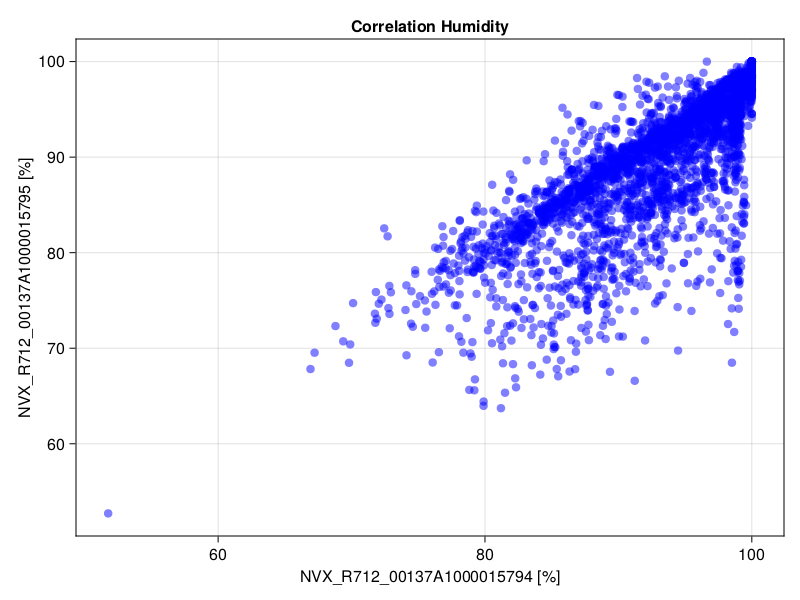

In [20]:
using Makie, CairoMakie

f = Figure()
ax = Axis(f[1, 1], title="Correlation Humidity", xlabel="NVX_R712_00137A1000015794 [%]", ylabel="NVX_R712_00137A1000015795 [%]")
sc = scatter!(ax, ter_joined.rel_humidity_pctg, ter_joined.rel_humidity_pctg_1, color = (:blue, 0.5))
f

It's a good idea to add information about the cc and the number of observations to this plot.

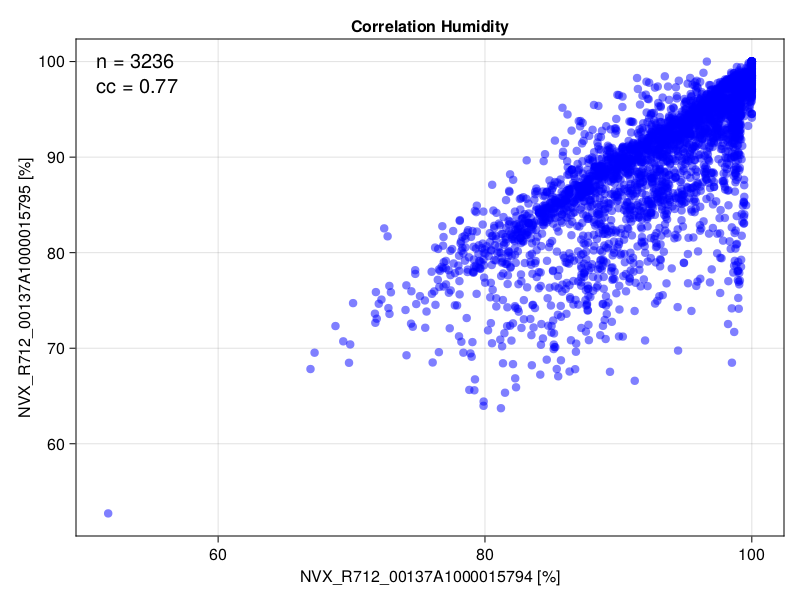

In [21]:
f = Figure()
ax = Axis(f[1, 1], title="Correlation Humidity", xlabel="NVX_R712_00137A1000015794 [%]", ylabel="NVX_R712_00137A1000015795 [%]")
sc = scatter!(ax, ter_joined.rel_humidity_pctg, ter_joined.rel_humidity_pctg_1, color = (:blue, 0.5))

text!(
        ax, 0, 1,
        text = ["n = $n"], 
        align = (:left, :top),
        offset = (20, -10),
        space = :relative,
        fontsize = 20
    )

text!(
        ax, 0, 1,
        text = ["cc = $rounded_cc_hum"], 
        align = (:left, :top),
        offset = (20, -35),
        space = :relative,
        fontsize = 20
    )

f

Next, I will use the *line plot* to compare the measuements form the two sensors.

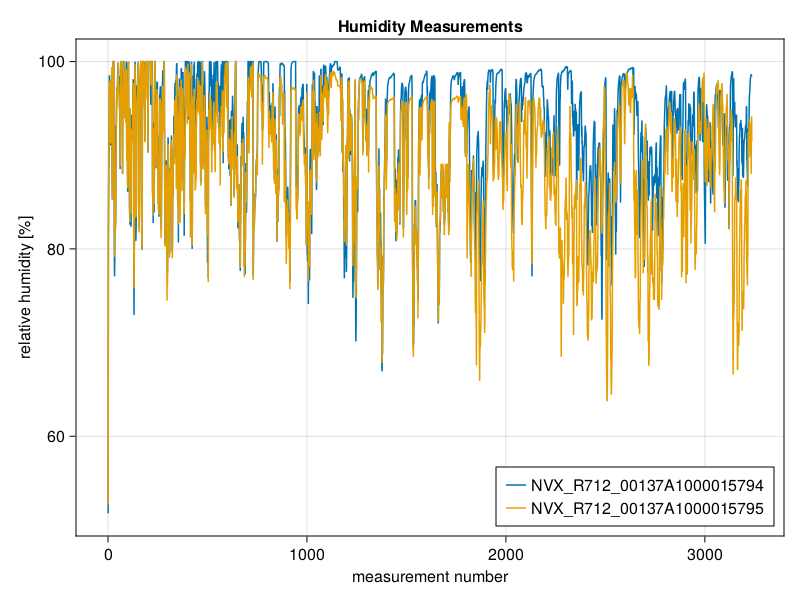

CairoMakie.Screen{IMAGE}


In [22]:
f2 = Figure()
ax2 = Axis(f2[1, 1], title = "Humidity Measurements", xlabel = "measurement number", ylabel = "relative humidity [%]")	
l1 = lines!(ter_joined.rel_humidity_pctg, label = "NVX_R712_00137A1000015794")
l2 = lines!(ax2, ter_joined.rel_humidity_pctg_1, label = "NVX_R712_00137A1000015795")
axislegend(position = :rb)
display(f2)

Repeat everything for the temperature values.

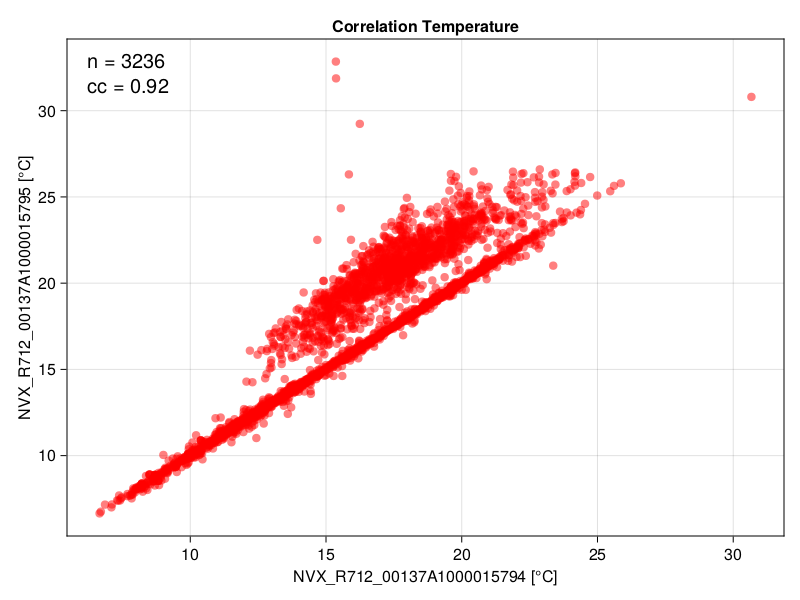

In [23]:
f3 = Figure()
ax = Axis(f3[1, 1], title="Correlation Temperature", xlabel="NVX_R712_00137A1000015794 [°C]", ylabel="NVX_R712_00137A1000015795 [°C]")
sc3 = scatter!(ax, ter_joined.temperature_c, ter_joined.temperature_c_1, color = (:red, 0.5))

text!(
        ax, 0, 1,
        text = ["n = $n"], 
        align = (:left, :top),
        offset = (20, -10),
        space = :relative,
        fontsize = 20
    )

text!(
        ax, 0, 1,
        text = ["cc = $rounded_cc_tem"], 
        align = (:left, :top),
        offset = (20, -35),
        space = :relative,
        fontsize = 20
    )

f3

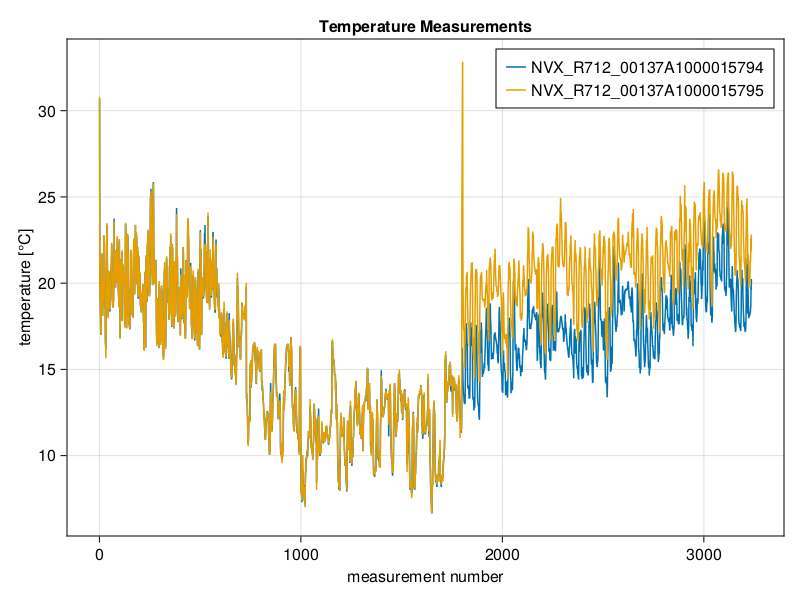

CairoMakie.Screen{IMAGE}


In [24]:
f4 = Figure()
ax4 = Axis(f4[1, 1], title = "Temperature Measurements", xlabel = "measurement number", ylabel = "temperature [°C]")	
l1 = lines!(ter_joined.temperature_c, label = "NVX_R712_00137A1000015794")
l2 = lines!(ax4, ter_joined.temperature_c_1, label = "NVX_R712_00137A1000015795")
axislegend()
display(f4)

It will be interesting to compare the mean values of the IoT sensors with the national reference station called IPMA.

To do so, we need to read data from the reference IPMA station and repeat the steps.

In [26]:
ipma = CSV.read("data/ipma.csv", DataFrame);

In [27]:
select!(ipma, Not([:wind_speed_kmh, :radiation_kjm2, :wind_direction_bin, :precipitation_accum_mm, :pressure_hpa, :id, :bat_volt]));

In [28]:
ter_ipma_joined = leftjoin(ter_joined, ipma, on = :timestamp, makeunique=true);

In [29]:
dropmissing!(ter_ipma_joined, [:station_id_2, :temperature_c_2, :rel_humidity_pctg_2])

Row,timestamp,station_id,temperature_c,rel_humidity_pctg,station_id_1,temperature_c_1,rel_humidity_pctg_1,mean_temperature,mean_humidity,station_id_2,temperature_c_2,rel_humidity_pctg_2
,DateTime,String31,Float64,Float64,String31,Float64?,Float64?,Float64,Float64,Int64,Float64,Float64
1,2022-07-16T14:00:00,NVX_R712_00137A1000015794,30.67,51.76,NVX_R712_00137A1000015795,30.8,52.71,30.735,52.235,11217372,21.0,94.0
2,2022-07-16T15:00:00,NVX_R712_00137A1000015794,20.72,80.13,NVX_R712_00137A1000015795,20.61,80.68,20.665,80.405,11217372,20.7,95.0
3,2022-07-16T17:00:00,NVX_R712_00137A1000015794,20.1,85.22,NVX_R712_00137A1000015795,19.97,85.51,20.035,85.365,11217372,20.4,97.0
4,2022-07-16T18:00:00,NVX_R712_00137A1000015794,19.07,89.77,NVX_R712_00137A1000015795,18.99,90.09,19.03,89.93,11217372,19.6,99.0
5,2022-07-16T19:00:00,NVX_R712_00137A1000015794,18.66,88.76,NVX_R712_00137A1000015795,18.65,89.26,18.655,89.01,11217372,18.9,99.0
6,2022-07-16T20:00:00,NVX_R712_00137A1000015794,17.81,93.71,NVX_R712_00137A1000015795,17.8,93.76,17.805,93.735,11217372,18.2,99.0
7,2022-07-17T02:00:00,NVX_R712_00137A1000015794,17.02,98.54,NVX_R712_00137A1000015795,17.07,97.95,17.045,98.245,11217372,17.2,99.0
8,2022-07-17T03:00:00,NVX_R712_00137A1000015794,17.04,97.79,NVX_R712_00137A1000015795,17.04,97.32,17.04,97.555,11217372,17.2,99.0
9,2022-07-17T08:00:00,NVX_R712_00137A1000015794,18.12,95.82,NVX_R712_00137A1000015795,18.12,95.62,18.12,95.72,11217372,17.9,99.0


In [30]:
CSV.write("ter_ipma_joined.csv", ter_ipma_joined)

"ter_ipma_joined.csv"

In [31]:
n2 = size(ter_ipma_joined, 1)

2454

In [32]:
# Calculating corelation coefficient for temperature 
cc_tem2 = cor(ter_ipma_joined.mean_temperature, ter_ipma_joined.temperature_c_2)

# And for humidity 
cc_hum2 = correlation_coefficient = cor(ter_ipma_joined.mean_humidity, ter_ipma_joined.rel_humidity_pctg_2)

0.7365828362227956

In [33]:
# Rounding to two decimal places
rounded_cc_tem2 = round(cc_tem2, digits=2)
rounded_cc_hum2 = round(cc_hum2, digits=2)

0.74

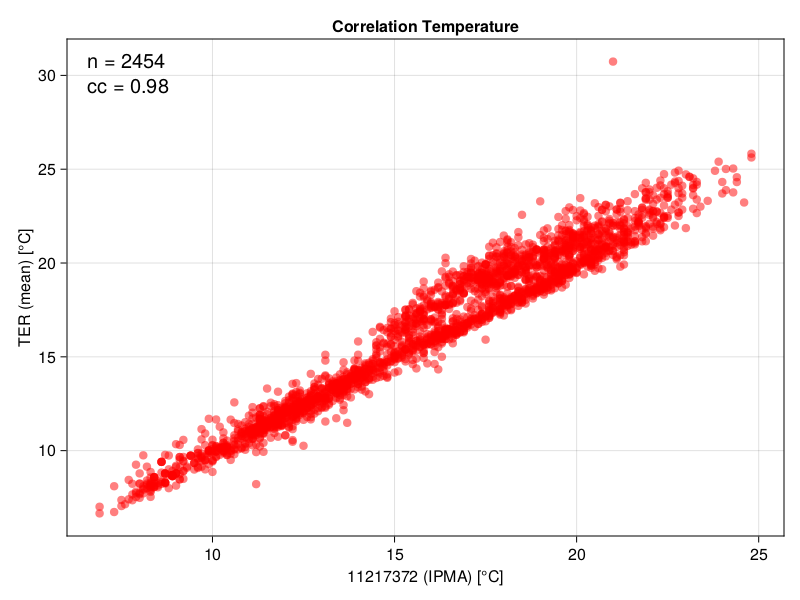

In [34]:
f5 = Figure()
ax = Axis(f5[1, 1], title="Correlation Temperature", xlabel="11217372 (IPMA) [°C]", ylabel="TER (mean) [°C]")
sc5 = scatter!(ax, ter_ipma_joined.temperature_c_2, ter_ipma_joined.mean_temperature, color = (:red, 0.5))

text!(
        ax, 0, 1,
        text = ["n = $n2"], 
        align = (:left, :top),
        offset = (20, -10),
        space = :relative,
        fontsize = 20
    )

text!(
        ax, 0, 1,
        text = ["cc = $rounded_cc_tem2"], 
        align = (:left, :top),
        offset = (20, -35),
        space = :relative,
        fontsize = 20
    )

f5

Side-by-side layout may increase readability, so let's add another plot to the right.

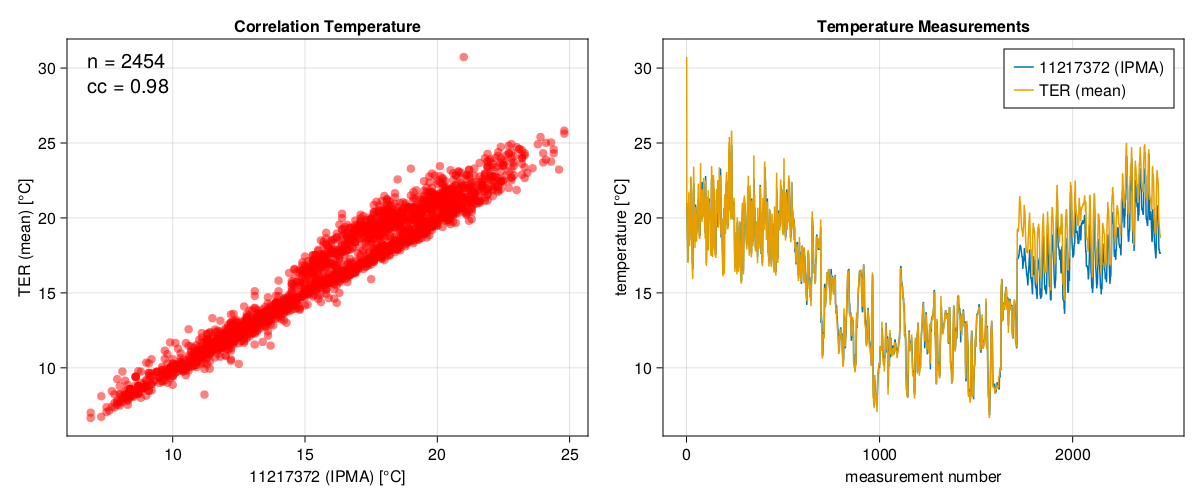

CairoMakie.Screen{IMAGE}


In [36]:
# Create a single figure with two axes side by side
fig = Figure(resolution = (1200, 500))

# First plot
ax = Axis(fig[1, 1], title="Correlation Temperature", xlabel="11217372 (IPMA) [°C]", ylabel="TER (mean) [°C]")
sc5 = scatter!(ax, ter_ipma_joined.temperature_c_2, ter_ipma_joined.mean_temperature, color = (:red, 0.5))

text!(
        ax, 0, 1,
        text = ["n = $n2"], 
        align = (:left, :top),
        offset = (20, -10),
        space = :relative,
        fontsize = 20
    )

text!(
        ax, 0, 1,
        text = ["cc = $rounded_cc_tem2"], 
        align = (:left, :top),
        offset = (20, -35),
        space = :relative,
        fontsize = 20
    )

# Second plot
ax1 = Axis(fig[1, 2], title = "Temperature Measurements", xlabel = "measurement number", ylabel = "temperature [°C]")	
l1 = lines!(ter_ipma_joined.temperature_c_2, label = "11217372 (IPMA)")
l2 = lines!(ax1, ter_ipma_joined.mean_temperature, label = "TER (mean)")
axislegend()

# Display the combined figure
display(fig)

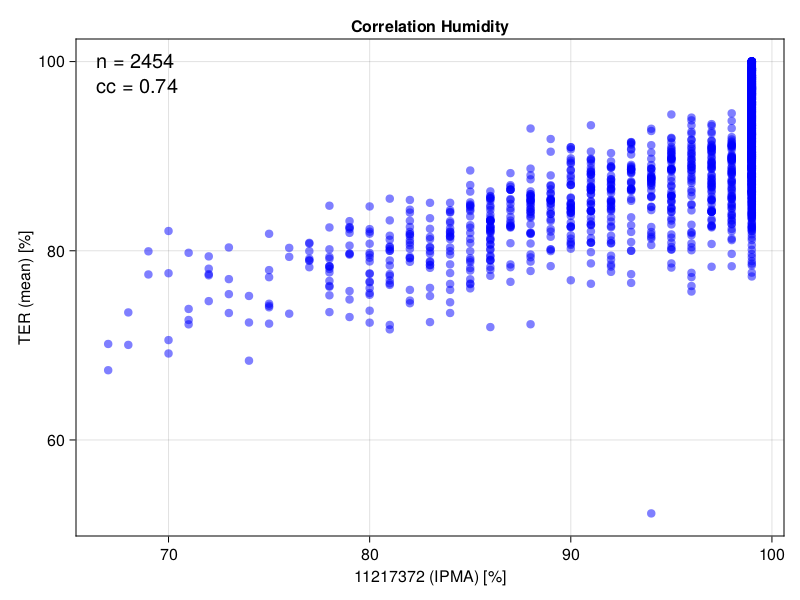

In [37]:
f6 = Figure()
ax = Axis(f6[1, 1], title="Correlation Humidity", xlabel="11217372 (IPMA) [%]", ylabel="TER (mean) [%]")
sc7 = scatter!(ax, ter_ipma_joined.rel_humidity_pctg_2, ter_ipma_joined.mean_humidity, color = (:blue, 0.5))

text!(
        ax, 0, 1,
        text = ["n = $n2"], 
        align = (:left, :top),
        offset = (20, -10),
        space = :relative,
        fontsize = 20
    )

text!(
        ax, 0, 1,
        text = ["cc = $rounded_cc_hum2"], 
        align = (:left, :top),
        offset = (20, -35),
        space = :relative,
        fontsize = 20
    )

f6

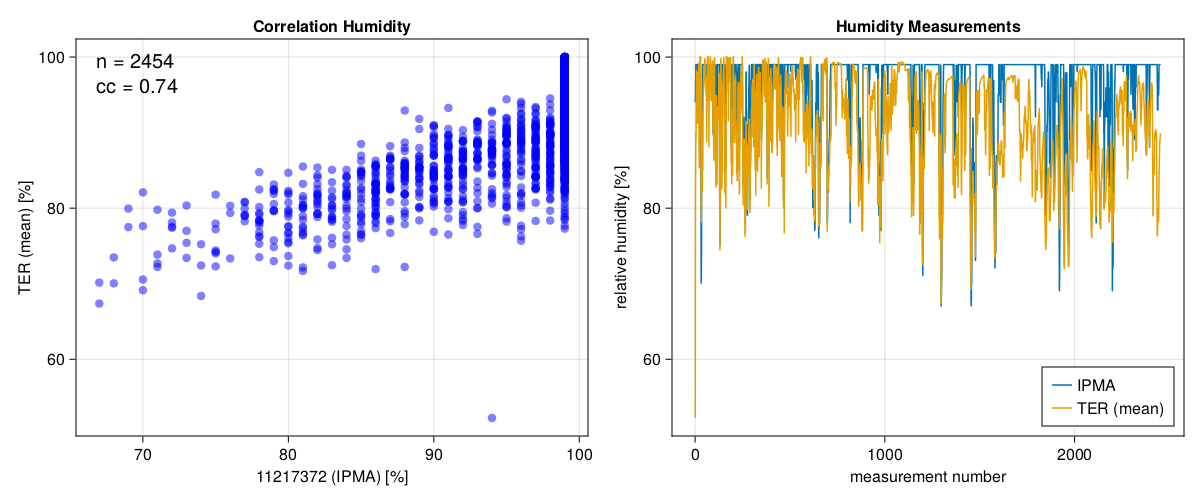

CairoMakie.Screen{IMAGE}


In [38]:
# Create a single figure with two axes side by side
fig = Figure(resolution = (1200, 500))

# First plot
ax = Axis(fig[1, 1], title="Correlation Humidity", xlabel="11217372 (IPMA) [%]", ylabel="TER (mean) [%]")
sc8 = scatter!(ax, ter_ipma_joined.rel_humidity_pctg_2, ter_ipma_joined.mean_humidity, color = (:blue, 0.5))

text!(
        ax, 0, 1,
        text = ["n = $n2"], 
        align = (:left, :top),
        offset = (20, -10),
        space = :relative,
        fontsize = 20
    )

text!(
        ax, 0, 1,
        text = ["cc = $rounded_cc_hum2"], 
        align = (:left, :top),
        offset = (20, -35),
        space = :relative,
        fontsize = 20
    )

# Second plot
ax1 = Axis(fig[1, 2], title = "Humidity Measurements", xlabel = "measurement number", ylabel = "relative humidity [%]")	
l1 = lines!(ter_ipma_joined.rel_humidity_pctg_2, label = "IPMA")
l2 = lines!(ax1, ter_ipma_joined.mean_humidity, label = "TER (mean)")
axislegend(position = :rb)

# Display the combined figure
display(fig)

## 👀 One cool finding 

The LoRaWAN sensors have a better performance for temperature measurements than humidity.